In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, precision_recall_curve,
                             f1_score, accuracy_score)
from sklearn.feature_selection import (
    RFE, 
    RFECV, 
    SelectKBest, 
    f_classif, 
    chi2, 
    mutual_info_classif
)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
#Import for Normality testing
from scipy.stats import shapiro

#Other Stats Testing
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind
import warnings
warnings.filterwarnings('ignore')
import itertools

C:\Users\Lehma\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data =  pd.read_csv('earthquake_data_tsunami.csv')
data.head(5)  #Get a glipse of the data

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [3]:
print("Missing Values:")
print(data.isnull().sum())
print("Missing percentage:")
print((data.isnull().sum() / len(data) * 100).round(2))

Missing Values:
magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64
Missing percentage:
magnitude    0.0
cdi          0.0
mmi          0.0
sig          0.0
nst          0.0
dmin         0.0
gap          0.0
depth        0.0
latitude     0.0
longitude    0.0
Year         0.0
Month        0.0
tsunami      0.0
dtype: float64


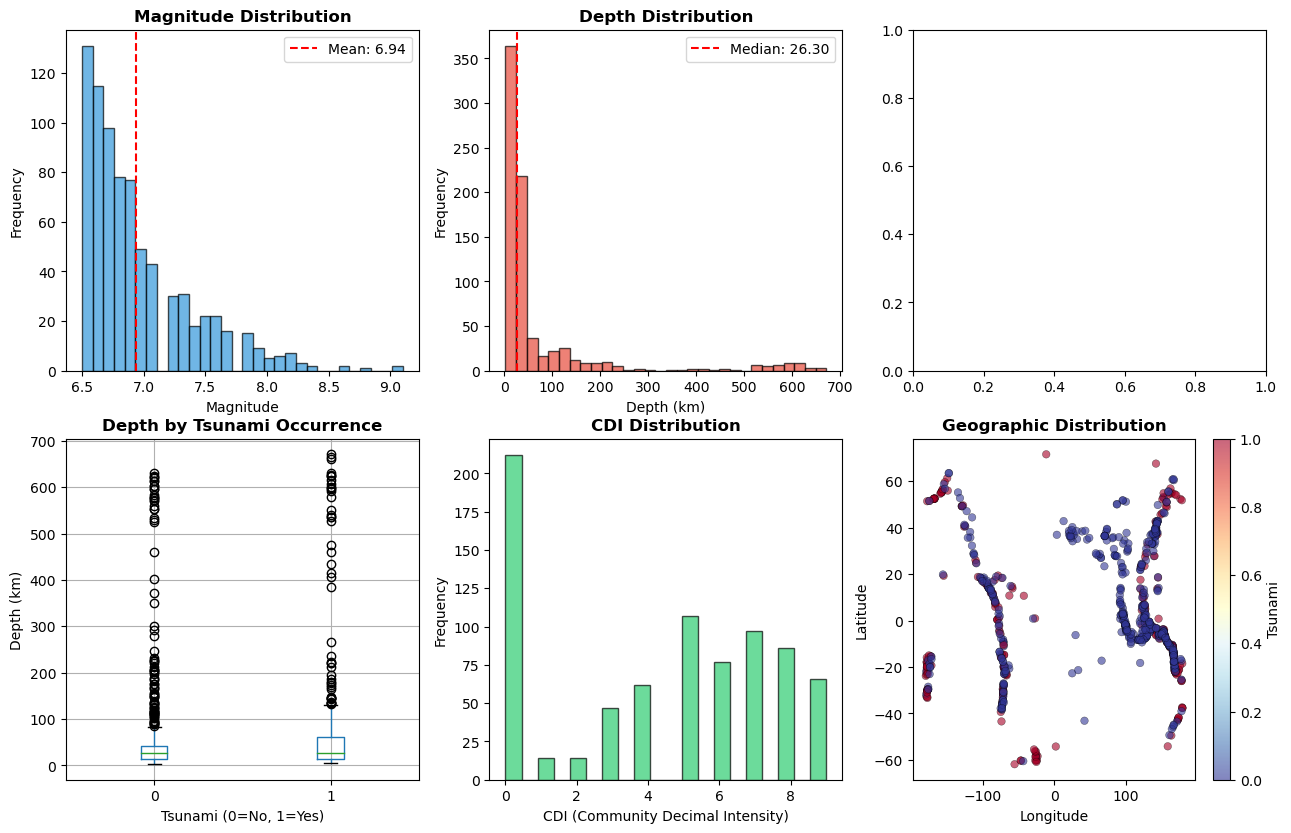

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Magnitude distribution
axes[0, 0].hist(data['magnitude'], bins=30, edgecolor='black', alpha=0.7, color='#3498db')
axes[0, 0].set_title('Magnitude Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Magnitude')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(data['magnitude'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {data["magnitude"].mean():.2f}')
axes[0, 0].legend()

# Depth distribution
axes[0, 1].hist(data['depth'], bins=30, edgecolor='black', alpha=0.7, color='#e74c3c')
axes[0, 1].set_title('Depth Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Depth (km)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(data['depth'].median(), color='red', linestyle='--',
                   label=f'Median: {data["depth"].median():.2f}')
axes[0, 1].legend()

data.boxplot(column='depth', by='tsunami', ax=axes[1, 0])
axes[1, 0].set_title('Depth by Tsunami Occurrence', fontweight='bold')
axes[1, 0].set_xlabel('Tsunami (0=No, 1=Yes)')
axes[1, 0].set_ylabel('Depth (km)')
axes[1, 0].get_figure().suptitle('')

axes[1, 1].hist(data['cdi'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='#2ecc71')
axes[1, 1].set_title('CDI Distribution', fontweight='bold')
axes[1, 1].set_xlabel('CDI (Community Decimal Intensity)')
axes[1, 1].set_ylabel('Frequency')

scatter = axes[1, 2].scatter(data['longitude'], data['latitude'], 
                             c=data['tsunami'], cmap='RdYlBu_r',
                             s=30, alpha=0.6, edgecolors='black', linewidth=0.3)
axes[1, 2].set_title('Geographic Distribution', fontweight='bold')
axes[1, 2].set_xlabel('Longitude')
axes[1, 2].set_ylabel('Latitude')
plt.colorbar(scatter, ax=axes[1, 2], label='Tsunami')

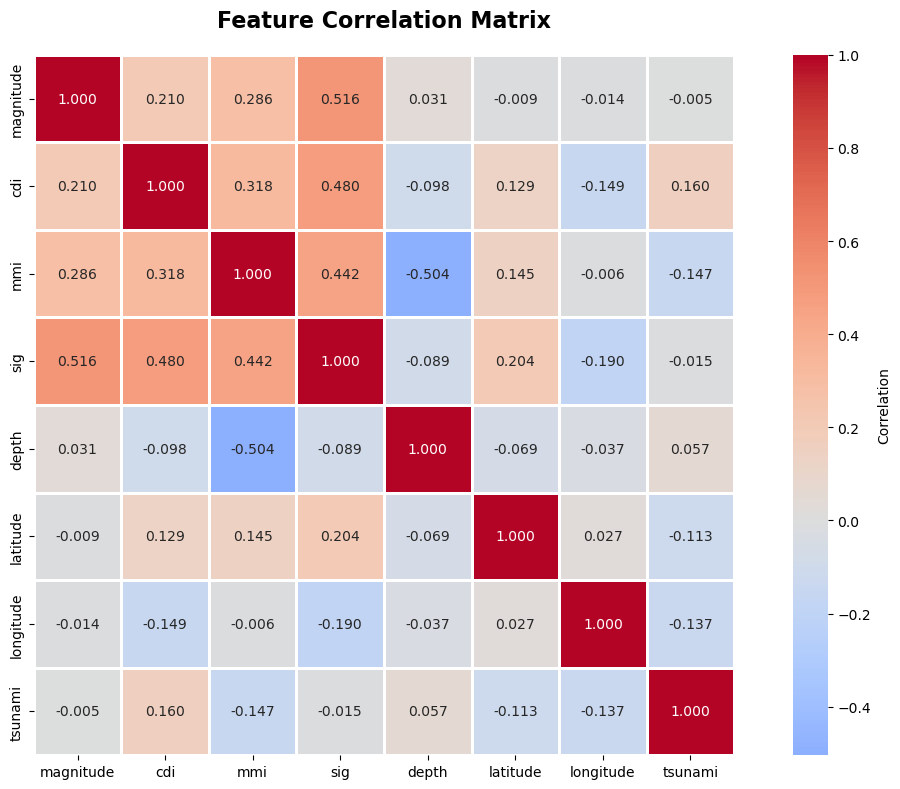

In [5]:
plt.figure(figsize=(12, 8))
correlation = data[['magnitude', 'cdi', 'mmi', 'sig', 'depth', 'latitude', 'longitude', 'tsunami']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [6]:
print(f"1. Magnitude range: {data['magnitude'].min():.1f} to {data['magnitude'].max():.1f}")
print(f"2. Average magnitude for tsunamis: {data[data['tsunami']==1]['magnitude'].mean():.2f}")
print(f"3. Average magnitude for no tsunamis: {data[data['tsunami']==0]['magnitude'].mean():.2f}")
print(f"4. Depth range: {data['depth'].min():.1f} to {data['depth'].max():.1f} km")

1. Magnitude range: 6.5 to 9.1
2. Average magnitude for tsunamis: 6.94
3. Average magnitude for no tsunamis: 6.94
4. Depth range: 2.7 to 670.8 km


In [7]:
tsunami_mag = data[data['tsunami'] == 1]['magnitude']
no_tsunami_mag = data[data['tsunami'] == 0]['magnitude']

statistic, p_value = mannwhitneyu(tsunami_mag, no_tsunami_mag, alternative='two-sided')
print("\\n1. Mann-Whitney U Test: Magnitude vs Tsunami")
print(f"   H0: No difference in magnitude between tsunami and non-tsunami events")
print(f"   Statistic: {statistic:.4f}")
print(f"   P-value: {p_value:.6f}")
print(f"   Result: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'}")
print(f"   Median magnitude (tsunami): {tsunami_mag.median():.2f}")
print(f"   Median magnitude (no tsunami): {no_tsunami_mag.median():.2f}")
print(f"   Result: {'Tsunamis have significantly different magnitudes' if p_value < 0.05 else 'No significant difference'}")

\n1. Mann-Whitney U Test: Magnitude vs Tsunami
   H0: No difference in magnitude between tsunami and non-tsunami events
   Statistic: 73919.5000
   P-value: 0.679800
   Result: FAIL TO REJECT H0
   Median magnitude (tsunami): 6.80
   Median magnitude (no tsunami): 6.80
   Result: No significant difference


In [8]:
stat, pvalue = shapiro(data[0:782])
print(f"Shapiro-Wilk Test Statistic: {stat:.3f}")
print(f"P-value: {pvalue:.3f}")

Shapiro-Wilk Test Statistic: 0.516
P-value: 0.000


In [9]:
#T-test
tsunami_depth = data[data['tsunami'] == 1]['depth']
no_tsunami_depth = data[data['tsunami'] == 0]['depth']

statistic, p_value = ttest_ind(tsunami_depth, no_tsunami_depth)
print("\\n2. Independent T-Test: Depth vs Tsunami")
print(f"   H0: No difference in depth between tsunami and non-tsunami events")
print(f"   Statistic: {statistic:.4f}")
print(f"   P-value: {p_value:.6f}")
print(f"   Result: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'}")
print(f"   Mean depth (tsunami): {tsunami_depth.mean():.2f} km")
print(f"   Mean depth (no tsunami): {no_tsunami_depth.mean():.2f} km")
print(f"   Result: {'Depth is significantly different for tsunamis' if p_value < 0.05 else 'No significant difference'}")

\n2. Independent T-Test: Depth vs Tsunami
   H0: No difference in depth between tsunami and non-tsunami events
   Statistic: 1.5893
   P-value: 0.112397
   Result: FAIL TO REJECT H0
   Mean depth (tsunami): 85.66 km
   Mean depth (no tsunami): 69.67 km
   Result: No significant difference


In [10]:
#A/B Testing with Continuous Values
group_a = data[data['magnitude'] < 7]['magnitude']
group_b = data[data['magnitude'] >= 7]['magnitude']

t_stat, p_v = stats.ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_v:.3f}")

if p_v < 0.05:
    print("Result: Statistically significant difference")
else:
    print("Result: No significant difference")

T-statistic: -38.004
P-value: 0.000
Result: Statistically significant difference


In [11]:
#A/B Testing with Proportions
group_a_tsunami = data[data['magnitude'] < 7]['tsunami'].value_counts()
group_b_tsunami = data[data['magnitude'] >= 7]['tsunami'].value_counts()

cont_table = pd.DataFrame({
    'Group_A': [group_a_tsunami.get(1, 0), group_a_tsunami.get(0, 0)],
    'Group_B': [group_b_tsunami.get(1, 0), group_b_tsunami.get(0, 0)]
}, index=['Tsunami', 'No_Tsunami'])

# Perform chi-square test
chi2, pvalue, dof, expected = stats.chi2_contingency(cont_table)

print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {pvalue:.3f}")

if p_value < 0.05:
    print("Result: Significant difference in proportions")
else:
    print("Result: No significant difference")

Chi-square statistic: 0.000
P-value: 1.000
Result: No significant difference


In [10]:
contingency_table = pd.crosstab(data['Month'], data['tsunami'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("\\n3. Chi-Square Test: Tsunami Occurrence by Month")
print(f"   H0: Tsunami occurrence is independent of month")
print(f"   Chi-square statistic: {chi2:.4f}")
print(f"   P-value: {p_value:.6f}")
print(f"   Degrees of freedom: {dof}")
print(f"   Result: {'REJECT H0' if p_value < 0.05 else 'FAIL TO REJECT H0'} (α=0.05)")
print(f"   Final Result: {'Seasonality detected' if p_value < 0.05 else 'No seasonal pattern'}")

\n3. Chi-Square Test: Tsunami Occurrence by Month
   H0: Tsunami occurrence is independent of month
   Chi-square statistic: 11.1213
   P-value: 0.433157
   Degrees of freedom: 11
   Result: FAIL TO REJECT H0 (α=0.05)
   Final Result: No seasonal pattern


In [11]:
features = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
for feature in features:
    valid_data = data[[feature, 'tsunami']].dropna()
    corr, p_val = stats.pearsonr(valid_data[feature], valid_data['tsunami'])
    significance = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
    print(f"   {feature:15s}: r={corr:7.4f}, p={p_val:.6f} {significance}")

   magnitude      : r=-0.0047, p=0.895025 ns
   depth          : r= 0.0568, p=0.112397 ns
   cdi            : r= 0.1603, p=0.000007 ***
   mmi            : r=-0.1474, p=0.000035 ***
   sig            : r=-0.0155, p=0.665183 ns


In [12]:
df = data
df['depth_category'] = pd.cut(df['depth'], 
                               bins=[0, 70, 300, 1000],
                               labels=['Shallow', 'Intermediate', 'Deep'])
df['mag_squared'] = df['magnitude'] ** 2
df['is_shallow'] = (df['depth'] < 70).astype(int)
df['mag_shallow_interaction'] = df['magnitude'] * df['is_shallow']

In [13]:
def find_region(row):
    lat, lon = row['latitude'], row['longitude']
    if -10 < lat < 30 and 95 < lon < 145:
        return 'Southeast_Asia'
    elif -30 < lat < 10 and 150 < lon < 180:
        return 'Southwest_Pacific'
    elif -90 < lat < -30 and 160 < lon < 180:
        return 'South_Pacific'
    elif 30 < lat < 60 and 140 < lon < 180:
        return 'Northwest_Pacific'
    elif -30 < lat < 30 and -180 < lon < -70:
        return 'Americas'
    else:
        return 'Other'
df['region'] = df.apply(find_region, axis=1)

In [14]:
df.head(5)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,depth_category,mag_squared,is_shallow,mag_shallow_interaction,region
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1,Shallow,49.00,1,7.0,Southwest_Pacific
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0,Shallow,47.61,1,6.9,Southeast_Asia
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1,Deep,49.00,0,0.0,Americas
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1,Shallow,53.29,1,7.3,Americas
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1,Deep,43.56,0,0.0,Southwest_Pacific


In [15]:
df['is_summer'] = df['Month'].isin([6, 7, 8]).astype(int)

df['subduction'] = df['depth'] / 100 + abs(df['latitude']) / 10

In [16]:
df['high_intensity'] = ((df['cdi'] >= 7) | (df['mmi'] >= 7)).astype(int)

In [17]:
feature_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap',
                'latitude', 'longitude', 'mag_squared', 'is_shallow',
                'mag_shallow_interaction', 'subduction', 'high_intensity']

In [18]:
df_new = df[feature_cols + ['tsunami']].copy()
df_new = df_new.fillna(df_new.mean())

In [19]:
df_new.head(5)

,magnitude,depth,cdi,mmi,sig,nst,dmin,gap,latitude,longitude,mag_squared,is_shallow,mag_shallow_interaction,subduction,high_intensity,tsunami
0,7.0,14.000,8,7,768,117,0.509,17.0,-9.7963,159.596,49.00,1,7.0,1.11963,1,1
1,6.9,25.000,4,4,735,99,2.229,34.0,-4.9559,100.738,47.61,1,6.9,0.74559,0,0
2,7.0,579.000,3,3,755,147,3.125,18.0,-20.0508,-178.346,49.00,0,0.0,7.79508,0,1
3,7.3,37.000,5,5,833,149,1.865,21.0,-19.2918,-172.129,53.29,1,7.3,2.29918,0,1
4,6.6,624.464,0,2,670,131,4.998,27.0,-25.5948,178.278,43.56,0,0.0,8.80412,0,1


In [20]:
X = df_new[feature_cols]
y = df_new['tsunami']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
tuning_results = {}
base_results = {}

Logistic Regression

In [23]:
#Base Model
lr_base = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_base.fit(X_train_scaled, y_train)
y_pred_lr = lr_base.predict(X_test_scaled)
y_pred_proba_lr = lr_base.predict_proba(X_test_scaled)[:, 1]

base_results['Logistic Regression'] = {
    'model': lr_base,
    'predictions': y_pred_lr,
    'probabilities': y_pred_proba_lr,
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_lr)
}

accuracy_score(y_test, y_pred_lr)

0.8152866242038217

In [24]:
#Feature Selection with RFE
rfe_lr = RFE(LogisticRegression(random_state=42, max_iter=1000), n_features_to_select=5)
rfe_lr.fit(X_train_scaled, y_train)

rfe_lr_features = [feature_cols[i] for i, selected in enumerate(rfe_lr.support_) if selected]
rfe_lr_ranking = pd.DataFrame({
    'Feature': feature_cols,
    'Ranking': rfe_lr.ranking_,
    'Selected': rfe_lr.support_
}).sort_values('Ranking')

print(rfe_lr_ranking)

                    Feature  Ranking  Selected
0                 magnitude        1      True
4                       sig        1      True
5                       nst        1      True
11               is_shallow        1      True
12  mag_shallow_interaction        1      True
1                     depth        2     False
13               subduction        3     False
3                       mmi        4     False
2                       cdi        5     False
8                  latitude        6     False
7                       gap        7     False
10              mag_squared        8     False
6                      dmin        9     False
14           high_intensity       10     False
9                 longitude       11     False


In [25]:
X_train_rfe_log = rfe_lr.transform(X_train_scaled)
X_test_rfe_log = rfe_lr.transform(X_test_scaled)

model_rfe_lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model_rfe_lr.fit(X_train_rfe_log, y_train)
y_pred_rfe_lr = model_rfe_lr.predict(X_test_rfe_log)
y_pred_proba_rfe_lr = model_rfe_lr.predict_proba(X_test_rfe_log)[:, 1]

print(f"\\nRFE-LR Test Performance:")
print(f"  Selected features: {rfe_lr_features}")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rfe_lr):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_rfe_lr):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rfe_lr):.4f}")

\nRFE-LR Test Performance:
  Selected features: ['magnitude', 'sig', 'nst', 'is_shallow', 'mag_shallow_interaction']
  Accuracy: 0.8153
  F1-Score: 0.7914
  ROC-AUC: 0.8867


In [26]:
#Feature Selection with RFECV
rfecv_lr = RFECV(LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
                 step=1,
                 cv=StratifiedKFold(5),
                 scoring='roc_auc',
                 n_jobs=-1)
rfecv_lr.fit(X_train_scaled, y_train)
rfecv_lr_features = [feature_cols[i] for i, selected in enumerate(rfecv_lr.support_) if selected]

print(f"RFECV with Logistic Regression:")
print(f"Optimal number of features: {rfecv_lr.n_features_}")
print(f"Selected features: {rfecv_lr_features}")

# Create a detailed ranking
rfecv_lr_ranking = pd.DataFrame({
    'Feature': feature_cols,
    'Selected': rfecv_lr.support_,
    'Ranking': rfecv_lr.ranking_
}).sort_values('Ranking')

print("\\n" + rfecv_lr_ranking.to_string(index=False))

RFECV with Logistic Regression:
Optimal number of features: 15
Selected features: ['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'latitude', 'longitude', 'mag_squared', 'is_shallow', 'mag_shallow_interaction', 'subduction', 'high_intensity']
\n                Feature  Selected  Ranking
              magnitude      True        1
                  depth      True        1
                    cdi      True        1
                    mmi      True        1
                    sig      True        1
                    nst      True        1
                   dmin      True        1
                    gap      True        1
               latitude      True        1
              longitude      True        1
            mag_squared      True        1
             is_shallow      True        1
mag_shallow_interaction      True        1
             subduction      True        1
         high_intensity      True        1


In [27]:
X_train_rfecv_lr = rfecv_lr.transform(X_train_scaled)
X_test_rfecv_lr = rfecv_lr.transform(X_test_scaled)

model_rfecv_lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model_rfecv_lr.fit(X_train_rfecv_lr, y_train)
y_pred_rfecv_lr = model_rfecv_lr.predict(X_test_rfecv_lr)
y_pred_proba_rfecv_lr = model_rfecv_lr.predict_proba(X_test_rfecv_lr)[:, 1]

print(f"  Accuracy: {accuracy_score(y_test, y_pred_rfecv_lr):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_rfecv_lr):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rfecv_lr):.4f}")

  Accuracy: 0.8153
  F1-Score: 0.7914
  ROC-AUC: 0.8810


In [28]:
#Hyperparameter Tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}
grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid_lr.fit(X_train_rfecv_lr, y_train)
print(f"Best Parameters: {grid_lr.best_params_}")

Best Parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [29]:
y_pred_lr_tuned = grid_lr.predict(X_test_rfecv_lr)
y_pred_proba_lr_tuned = grid_lr.predict_proba(X_test_scaled)[:, 1]

accuracy_score(y_test, y_pred_lr_tuned)

0.8280254777070064

In [30]:
tuning_results['Logistic Regression'] = {
    'best_params': grid_lr.best_params_,
    'cv_score': grid_lr.best_score_,
    'test_accuracy': accuracy_score(y_test, y_pred_lr_tuned),
    'test_f1': f1_score(y_test, y_pred_lr_tuned),
    'test_roc_auc': roc_auc_score(y_test, y_pred_proba_lr_tuned)
}

In [31]:
lr_tuned = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', solver='liblinear',C=100,
                             penalty='l2')
lr_tuned.fit(X_train_scaled, y_train)
y_pred_lr_ = lr_tuned.predict(X_test_scaled)
y_pred_proba_lr_ = lr_tuned.predict_proba(X_test_scaled)[:, 1]

accuracy_score(y_test, y_pred_lr_)

0.8280254777070064

Random Forest

In [32]:
#Baseline Model for RF
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_base.fit(X_train_scaled, y_train)
y_pred_rf = rf_base.predict(X_test_scaled)
y_pred_proba_rf = rf_base.predict_proba(X_test_scaled)[:, 1]

base_results['Random Forest'] = {
    'model': rf_base,
    'predictions': y_pred_rf,
    'probabilities': y_pred_proba_rf,
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_rf)
}
accuracy_score(y_test, y_pred_rf)

0.9044585987261147

In [33]:
#Feature Selection with RFE
rfe_rf = RFE(RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1), n_features_to_select=5)
rfe_rf.fit(X_train_scaled, y_train)

rfe_rf_features = [feature_cols[i] for i, selected in enumerate(rfe_lr.support_) if selected]
rfe_rf_ranking = pd.DataFrame({
    'Feature': feature_cols,
    'Ranking': rfe_rf.ranking_,
    'Selected': rfe_rf.support_
}).sort_values('Ranking')

print(rfe_rf_ranking)

                    Feature  Ranking  Selected
5                       nst        1      True
6                      dmin        1      True
8                  latitude        1      True
9                 longitude        1      True
13               subduction        1      True
1                     depth        2     False
7                       gap        3     False
4                       sig        4     False
2                       cdi        5     False
3                       mmi        6     False
0                 magnitude        7     False
10              mag_squared        8     False
12  mag_shallow_interaction        9     False
11               is_shallow       10     False
14           high_intensity       11     False


In [34]:
X_train_rfe_rf = rfe_rf.transform(X_train_scaled)
X_test_rfe_rf = rfe_rf.transform(X_test_scaled)

model_rfe_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rfe_rf.fit(X_train_rfe_rf, y_train)
y_pred_rfe_rf = model_rfe_lr.predict(X_test_rfe_rf)
y_pred_proba_rfe_rf = model_rfe_lr.predict_proba(X_test_rfe_rf)[:, 1]

print(f"\\nRFE-LR Test Performance:")
print(f"  Selected features: {rfe_rf_features}")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rfe_rf):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_rfe_rf):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rfe_rf):.4f}")

\nRFE-LR Test Performance:
  Selected features: ['magnitude', 'sig', 'nst', 'is_shallow', 'mag_shallow_interaction']
  Accuracy: 0.5287
  F1-Score: 0.4861
  ROC-AUC: 0.4764


In [36]:
rfecv_rf = RFECV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                 step=1,
                 cv=StratifiedKFold(5),
                 scoring='roc_auc',
                 n_jobs=-1)
rfecv_rf.fit(X_train_scaled, y_train)
rfecv_rf_features = [feature_cols[i] for i, selected in enumerate(rfecv_rf.support_) if selected]

print(f"RFECV with Logistic Regression:")
print(f"Optimal number of features: {rfecv_rf.n_features_}")
print(f"Selected features: {rfecv_rf_features}")

# Create a detailed ranking
rfecv_rf_ranking = pd.DataFrame({
    'Feature': feature_cols,
    'Selected': rfecv_rf.support_,
    'Ranking': rfecv_rf.ranking_
}).sort_values('Ranking')

print("\\n" + rfecv_rf_ranking.to_string(index=False))

RFECV with Logistic Regression:
Optimal number of features: 11
Selected features: ['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'latitude', 'longitude', 'subduction']
\n                Feature  Selected  Ranking
              magnitude      True        1
                  depth      True        1
                    cdi      True        1
                    mmi      True        1
                    sig      True        1
                    nst      True        1
                   dmin      True        1
                    gap      True        1
               latitude      True        1
              longitude      True        1
             subduction      True        1
            mag_squared     False        2
mag_shallow_interaction     False        3
             is_shallow     False        4
         high_intensity     False        5


In [37]:
X_train_rfecv_rf = rfecv_rf.transform(X_train_scaled)
X_test_rfecv_rf = rfecv_rf.transform(X_test_scaled)

model_rfecv_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rfecv_rf.fit(X_train_rfecv_rf, y_train)
y_pred_rfecv_rf = model_rfecv_rf.predict(X_test_rfecv_rf)
y_pred_proba_rfecv_rf = model_rfecv_rf.predict_proba(X_test_rfecv_rf)[:, 1]

print(f"  Accuracy: {accuracy_score(y_test, y_pred_rfecv_rf):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_rfecv_rf):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rfecv_rf):.4f}")

  Accuracy: 0.8981
  F1-Score: 0.8689
  ROC-AUC: 0.9403


In [39]:
grid_rf_prm = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2,20],
    'min_samples_leaf': [1,10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),param_grid = grid_rf_prm,
                       cv=5, scoring='roc_auc',n_jobs=-1,verbose=1)

grid_rf.fit(X_train_rfecv_rf, y_train)
print(f"Best Parameters: {grid_rf.best_params_}")

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 200}


In [40]:
y_pred_rf_tuned = grid_rf.predict(X_test_rfecv_rf)
y_pred_proba_rf_tuned = grid_rf.predict_proba(X_test_rfecv_rf)[:, 1]

tuning_results['Random Forest'] = {
    'best_params': grid_rf.best_params_,
    'cv_score': grid_rf.best_score_,
    'test_accuracy': accuracy_score(y_test, y_pred_rf_tuned),
    'test_f1': f1_score(y_test, y_pred_rf_tuned),
    'test_roc_auc': roc_auc_score(y_test, y_pred_proba_rf_tuned),
}
accuracy_score(y_test, y_pred_rf_tuned)

0.8853503184713376

In [48]:
tuned_rfv = RandomForestClassifier(random_state=42, class_weight='balanced', bootstrap=False, max_depth=10, 
                                   max_features='sqrt', min_samples_leaf=1, min_samples_split=20, n_estimators=200)
tuned_rfv.fit(X_train_scaled, y_train)
y_pred_rfv = tuned_rfv.predict(X_test_scaled)
y_pred_proba_rfv = tuned_rfv.predict_proba(X_test_scaled)[:, 1]

accuracy_score(y_test, y_pred_rfv)

0.9044585987261147

In [49]:
#Using RandomizedSearchCV
random_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    param_distributions=grid_rf_prm,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random_rf.fit(X_train_rfecv_rf, y_train)
print(f"Best Parameters: {random_rf.best_params_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [50]:
y_pred_rforest_tuned = random_rf.predict(X_test_rfecv_rf)
y_pred_proba_rforest_tuned = random_rf.predict_proba(X_test_rfecv_rf)[:, 1]

tuning_results['Random Forest RandomSearch'] = {
    'best_params': random_rf.best_params_,
    'cv_score': random_rf.best_score_,
    'test_accuracy': accuracy_score(y_test, y_pred_rforest_tuned),
    'test_f1': f1_score(y_test, y_pred_rforest_tuned),
    'test_roc_auc': roc_auc_score(y_test, y_pred_proba_rforest_tuned),
}

accuracy_score(y_test, y_pred_rf_tuned)

0.8853503184713376

SVM

In [51]:
#Base model SVM
svm_base = SVC(probability=True, random_state=42, class_weight='balanced')
svm_base.fit(X_train_scaled, y_train)
y_pred_svm = svm_base.predict(X_test_scaled)
y_pred_proba_svm = svm_base.predict_proba(X_test_scaled)[:, 1]

base_results['SVM'] = {
    'model': svm_base,
    'predictions': y_pred_svm,
    'probabilities': y_pred_proba_svm,
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'f1': f1_score(y_test, y_pred_svm),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_svm)
}

accuracy_score(y_test, y_pred_svm)

0.8471337579617835

In [52]:
rfe_svm = RFE(SVC(kernel='linear',probability=True, random_state=42, class_weight='balanced'), n_features_to_select=5)
rfe_svm.fit(X_train_scaled, y_train)

rfe_svm_features = [feature_cols[i] for i, selected in enumerate(rfe_svm.support_) if selected]
rfe_svm_ranking = pd.DataFrame({
    'Feature': feature_cols,
    'Ranking': rfe_svm.ranking_,
    'Selected': rfe_svm.support_
}).sort_values('Ranking')

print(rfe_svm_ranking)

                    Feature  Ranking  Selected
0                 magnitude        1      True
5                       nst        1      True
10              mag_squared        1      True
11               is_shallow        1      True
12  mag_shallow_interaction        1      True
7                       gap        2     False
14           high_intensity        3     False
2                       cdi        4     False
6                      dmin        5     False
1                     depth        6     False
13               subduction        7     False
4                       sig        8     False
8                  latitude        9     False
9                 longitude       10     False
3                       mmi       11     False


In [53]:
X_train_rfe_svm = rfe_svm.transform(X_train_scaled)
X_test_rfe_svm = rfe_svm.transform(X_test_scaled)

model_rfe_svm = SVC(probability=True, random_state=42, class_weight='balanced')
model_rfe_svm.fit(X_train_rfe_svm, y_train)
y_pred_rfe_svm = model_rfe_svm.predict(X_test_rfe_svm)
y_pred_proba_rfe_svm = model_rfe_lr.predict_proba(X_test_rfe_svm)[:, 1]

print(f"\\nRFE-LR Test Performance:")
print(f"  Selected features: {rfe_svm_features}")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rfe_svm):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_rfe_svm):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rfe_svm):.4f}")

\nRFE-LR Test Performance:
  Selected features: ['magnitude', 'nst', 'mag_squared', 'is_shallow', 'mag_shallow_interaction']
  Accuracy: 0.8280
  F1-Score: 0.8085
  ROC-AUC: 0.5937


In [56]:
rfecv_svm = RFECV(SVC(kernel='linear',probability=True, random_state=42, class_weight='balanced'),
                 step=1,
                 cv=StratifiedKFold(5),
                 scoring='roc_auc',
                 n_jobs=-1)
rfecv_svm.fit(X_train_scaled, y_train)
rfecv_svm_features = [feature_cols[i] for i, selected in enumerate(rfecv_svm.support_) if selected]

print(f"RFECV with Logistic Regression:")
print(f"Optimal number of features: {rfecv_svm.n_features_}")
print(f"Selected features: {rfecv_svm_features}")

# Create a detailed ranking
rfecv_svm_ranking = pd.DataFrame({
    'Feature': feature_cols,
    'Selected': rfecv_svm.support_,
    'Ranking': rfecv_svm.ranking_
}).sort_values('Ranking')

print("\\n" + rfecv_svm_ranking.to_string(index=False))

RFECV with Logistic Regression:
Optimal number of features: 15
Selected features: ['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'latitude', 'longitude', 'mag_squared', 'is_shallow', 'mag_shallow_interaction', 'subduction', 'high_intensity']
\n                Feature  Selected  Ranking
              magnitude      True        1
                  depth      True        1
                    cdi      True        1
                    mmi      True        1
                    sig      True        1
                    nst      True        1
                   dmin      True        1
                    gap      True        1
               latitude      True        1
              longitude      True        1
            mag_squared      True        1
             is_shallow      True        1
mag_shallow_interaction      True        1
             subduction      True        1
         high_intensity      True        1


In [61]:
X_train_rfecv_svm = rfe_svm.transform(X_train_scaled)
X_test_rfecv_svm = rfe_svm.transform(X_test_scaled)

model_rfecv_svm = SVC(kernel='linear',probability=True, random_state=42, class_weight='balanced')
model_rfecv_svm.fit(X_train_rfecv_svm, y_train)
y_pred_rfecv_svm = model_rfe_svm.predict(X_test_rfecv_svm)
y_pred_proba_rfecv_svm = model_rfecv_svm.predict_proba(X_test_rfecv_svm)[:, 1]

print(f"\\nRFE-LR Test Performance:")
print(f"  Selected features: {rfecv_svm_features}")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rfecv_svm):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_rfecv_svm):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rfecv_svm):.4f}")

\nRFE-LR Test Performance:
  Selected features: ['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'latitude', 'longitude', 'mag_squared', 'is_shallow', 'mag_shallow_interaction', 'subduction', 'high_intensity']
  Accuracy: 0.8280
  F1-Score: 0.8085
  ROC-AUC: 0.8645


In [68]:
param_svm = {
        'C': [0.1, 1, 10, 100, 1000], 
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': [0.1, 1, 'scale', 'auto']
    }

grid_svm = GridSearchCV(SVC(random_state=42, class_weight='balanced',probability=True),param_grid = param_svm,cv=5, 
              scoring='roc_auc',n_jobs=-1,verbose=1)

grid_svm.fit(X_train_rfecv_svm, y_train)

grid_svm.fit(X_train_rfecv_svm, y_train)
print(f"Best Parameters: {grid_svm.best_params_}")


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


In [69]:
y_pred_svm_tuned = grid_svm.predict(X_test_rfecv_svm)
y_pred_proba_svm_tuned = grid_svm.predict_proba(X_test_rfecv_svm)[:, 1]

tuning_results['SVM'] = {
    'best_params': grid_svm.best_params_,
    'cv_score': grid_svm.best_score_,
    'test_accuracy': accuracy_score(y_test, y_pred_svm_tuned),
    'test_f1': f1_score(y_test, y_pred_svm_tuned),
    'test_roc_auc': roc_auc_score(y_test, y_pred_proba_svm_tuned),
}
accuracy_score(y_test, y_pred_svm_tuned)

0.8089171974522293

PCA

In [77]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X_train_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

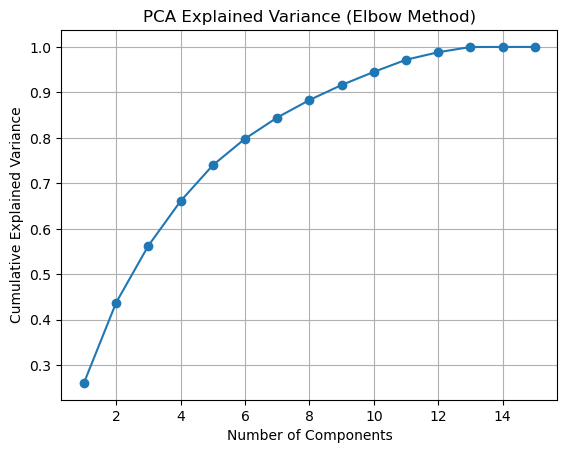

In [78]:
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance (Elbow Method)')
plt.grid()
plt.show()

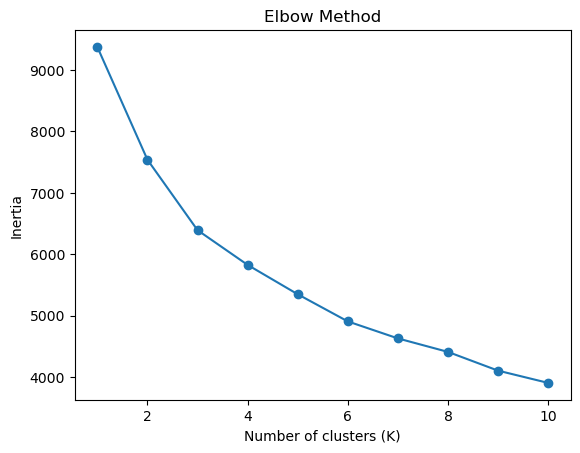

In [85]:
#With K-Means
from sklearn.cluster import KMeans

#Find the best K
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

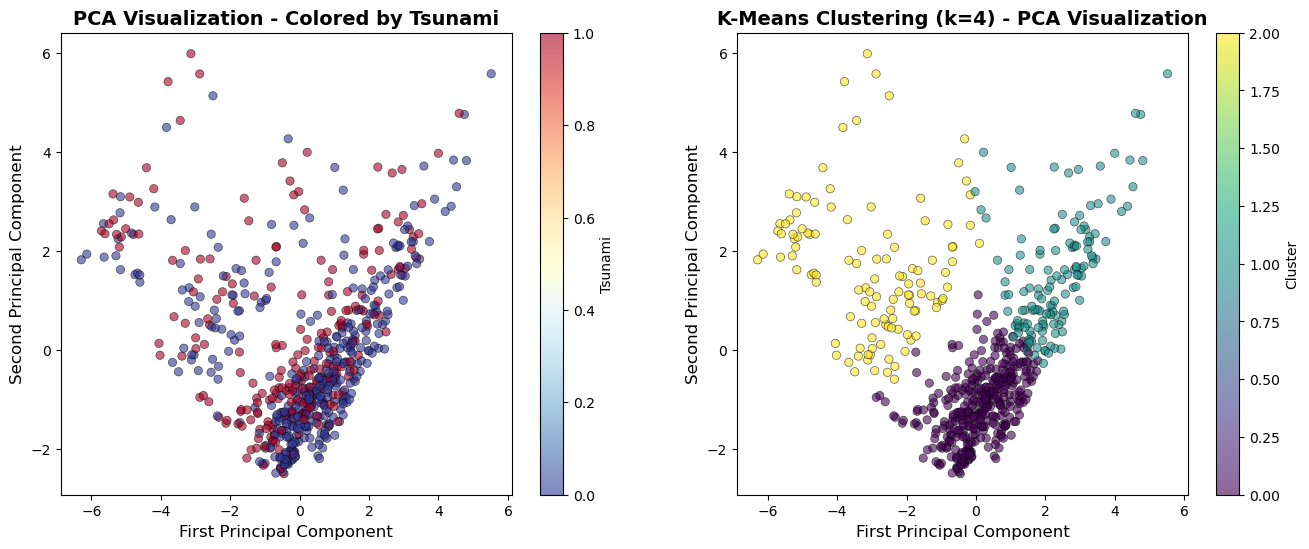

In [89]:
#K=3
pca = PCA(n_components=6, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=y_train, cmap='RdYlBu_r', alpha=0.6, 
                           edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('First Principal Component', fontsize=12)
axes[0].set_ylabel('Second Principal Component', fontsize=12)
axes[0].set_title('PCA Visualization - Colored by Tsunami', fontsize=14, fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Tsunami')

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train_scaled)

scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, 
                           cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('First Principal Component', fontsize=12)
axes[1].set_ylabel('Second Principal Component', fontsize=12)
axes[1].set_title('K-Means Clustering (k=4) - PCA Visualization', fontsize=14, fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')